In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame({'temperature': 36.6, 'pulse': 102, 'high_pressure': 120, 'low_pressure': 80, 'target': 0}, index=[0]).append({'temperature': 36.6, 'pulse': 102, 'high_pressure': 120, 'low_pressure': 80, 'target': 0}, ignore_index=True)

C:\Temp\ipykernel_3832\2233856258.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.DataFrame({'temperature': 36.6, 'pulse': 102, 'high_pressure': 120, 'low_pressure': 80, 'target': 0}, index=[0]).append({'temperature': 36.6, 'pulse': 102, 'high_pressure': 120, 'low_pressure': 80, 'target': 0}, ignore_index=True)


,temperature,pulse,high_pressure,low_pressure,target
0,36.6,102.0,120.0,80.0,0.0
1,36.6,102.0,120.0,80.0,0.0


In [3]:
data = pd.DataFrame({'temperature': 36.6, 'pulse': 70, 'high_pressure': 110, 'low_pressure': 80, 'target': 0}, index=[0])
data.head()

,temperature,pulse,high_pressure,low_pressure,target
0,36.6,70,110,80,0


In [4]:
for i in range(4_000):
    t = round(np.random.uniform(36.1, 37.2), 1)
    p = round(np.random.uniform(60, 100))
    h = round(np.random.uniform(90, 120))
    l = round(np.random.uniform(60, 90))
    r = 0.0
    new_data = pd.DataFrame({'temperature': t, 
                  'pulse': p, 
                  'high_pressure': h, 
                  'low_pressure': l, 
                  'target': r}, index=[data.index[-1]+1])
    data = pd.concat([data, new_data], ignore_index=True)

In [5]:
for i in range(4_000):
    t = round(np.random.uniform(37.3, 38.8), 1)
    p = round(np.random.uniform(101, 150))
    h = round(np.random.uniform(120, 139))
    l = round(np.random.uniform(80, 89))
    r = 1.0
    new_data = pd.DataFrame({'temperature': t, 
                  'pulse': p, 
                  'high_pressure': h, 
                  'low_pressure': l, 
                  'target': r}, index=[data.index[-1]+1])
    data = pd.concat([data, new_data], ignore_index=True)

In [6]:
for i in range(4_000):
    t = round(np.random.uniform(36.1, 37.2), 1)
    p = round(np.random.uniform(140, 150))
    h = round(np.random.uniform(121, 150))
    l = round(np.random.uniform(91, 110))
    r = 1.0
    new_data = pd.DataFrame({'temperature': t, 
                  'pulse': p, 
                  'high_pressure': h, 
                  'low_pressure': l, 
                  'target': r}, index=[data.index[-1]+1])
    data = pd.concat([data, new_data], ignore_index=True)

In [7]:
for i in range(4_000):
    t = round(np.random.uniform(35.2, 36.1), 1)
    p = round(np.random.uniform(40, 59))
    h = round(np.random.uniform(90, 120))
    l = round(np.random.uniform(65, 79))
    r = 1.0
    new_data = pd.DataFrame({'temperature': t, 
                  'pulse': p, 
                  'high_pressure': h, 
                  'low_pressure': l, 
                  'target': r}, index=[data.index[-1]+1])
    data = pd.concat([data, new_data], ignore_index=True)

<Axes: >

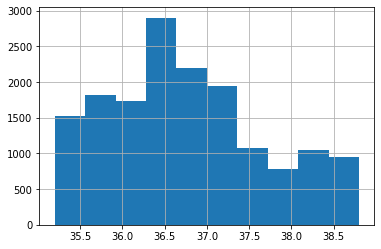

In [8]:
data['temperature'].hist()

<Axes: >

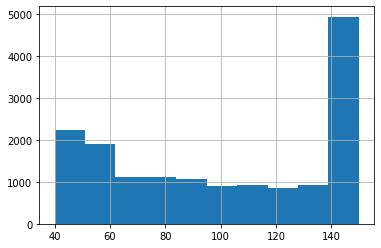

In [9]:
data['pulse'].hist()

<Axes: >

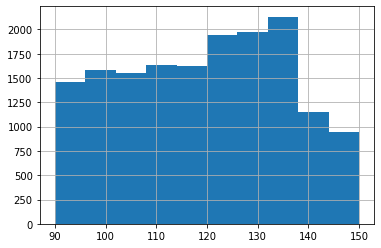

In [10]:
data['high_pressure'].hist()

<Axes: >

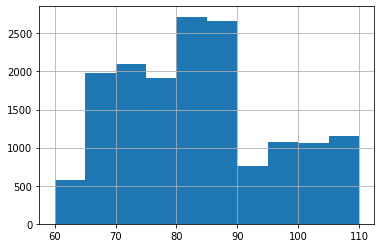

In [11]:
data['low_pressure'].hist()

<Axes: >

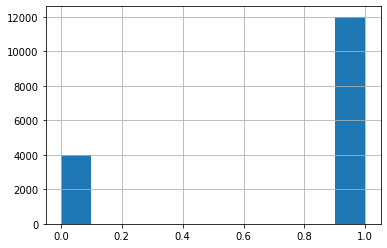

In [12]:
data['target'].hist()

In [13]:
data.describe()

,temperature,pulse,high_pressure,low_pressure,target
count,16001.000000,16001.000000,16001.000000,16001.000000,16001.000000
mean,36.752922,100.015687,118.870821,83.006062,0.749953
std,0.919661,38.798235,16.053691,12.486469,0.433053
min,35.200000,40.000000,90.000000,60.000000,0.000000
25%,36.100000,60.000000,105.000000,73.000000,0.000000
50%,36.700000,100.000000,120.000000,82.000000,1.000000
75%,37.200000,142.000000,132.000000,90.000000,1.000000
max,38.800000,150.000000,150.000000,110.000000,1.000000


In [14]:
data = data.sample(frac=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# x = data.drop(columns=['target'])
# y = data['target']

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(rf, param_grid, cv=5)

# grid_search.fit(x, y)

# print("Лучшие параметры:", grid_search.best_params_)
# print("Лучшее качество на кросс-валидации:", grid_search.best_score_)

In [16]:
x = data.drop(columns=['target'])
y = data['target']

best_rf = RandomForestClassifier(max_depth=5, 
                                 min_samples_leaf=1, 
                                 min_samples_split=2, 
                                 n_estimators=50, 
                                 random_state=42)
best_rf.fit(x, y)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [17]:
y_pred = best_rf.predict(x)

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [18]:
data.to_csv('data.csv', index=False)

In [19]:
test = pd.read_csv('data.csv')
test.head()

,temperature,pulse,high_pressure,low_pressure,target
0,36.6,141,127,103,1.0
1,36.6,91,109,62,0.0
2,35.5,51,104,78,1.0
3,36.7,69,115,61,0.0
4,36.1,142,127,96,1.0


In [20]:
np.array(x.iloc[0]).reshape(1, -1)

array([[ 36.6, 141. , 127. , 103. ]])

In [21]:
best_rf.predict(np.array([[36.6, 70., 126., 84.]]))

C:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [22]:
import pickle


with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [ ]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

    
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    

from torch.utils.data import DataLoader

train_dataset = MyDataset(x, y)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

import torch.optim as optim

input_dim = 4
hidden_dim = 32
output_dim = 1

model = MyModel(input_dim, hidden_dim, output_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100

for epoch in range(n_epochs):
    train_loss = 0.0
    train_acc = 0.0
    model.train()

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
        train_acc += ((y_pred > 0.5).float() == y_batch.unsqueeze(1)).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    print('Epoch: {:02d}, Train Loss: {:.4f}, Train Acc: {:.4f}'.format(epoch+1, train_loss, train_acc))


C:\Temp\ipykernel_3832\3035129226.py:24: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  self.X = torch.tensor(X.values, dtype=torch.float32)


Epoch: 01, Train Loss: 1.3160, Train Acc: 0.7959
Epoch: 02, Train Loss: 0.2366, Train Acc: 0.9244
Epoch: 03, Train Loss: 0.1839, Train Acc: 0.9516
Epoch: 04, Train Loss: 0.1533, Train Acc: 0.9567
Epoch: 05, Train Loss: 0.1373, Train Acc: 0.9576
Epoch: 06, Train Loss: 0.1213, Train Acc: 0.9627
Epoch: 07, Train Loss: 0.1115, Train Acc: 0.9650
Epoch: 08, Train Loss: 0.1048, Train Acc: 0.9645
Epoch: 09, Train Loss: 0.1113, Train Acc: 0.9595
Epoch: 10, Train Loss: 0.0920, Train Acc: 0.9687
Epoch: 11, Train Loss: 0.0886, Train Acc: 0.9688
Epoch: 12, Train Loss: 0.0831, Train Acc: 0.9713
Epoch: 13, Train Loss: 0.0783, Train Acc: 0.9740
Epoch: 14, Train Loss: 0.0780, Train Acc: 0.9713
Epoch: 15, Train Loss: 0.0693, Train Acc: 0.9754
Epoch: 16, Train Loss: 0.0690, Train Acc: 0.9750
Epoch: 17, Train Loss: 0.0647, Train Acc: 0.9767
Epoch: 18, Train Loss: 0.0597, Train Acc: 0.9789
Epoch: 19, Train Loss: 0.0562, Train Acc: 0.9804
Epoch: 20, Train Loss: 0.0529, Train Acc: 0.9826
Epoch: 21, Train Los

In [ ]:
model.eval()

model(torch.tensor(x.values).float()).detach()

In [ ]:
model.eval()

model(torch.tensor(np.array([[36.6, 70., 126., 84.]])).float()).detach()

In [ ]:
torch.save(model.state_dict(), 'torch_model.pth')